
1.	[40 points] Modify BGD and SGD codes from least squares linear regression for implementing batch gradient ascent and stochastic gradient ascent for logistic regression (you can find the codes from ICS485_IBL.ipynb that has been uploaded in Ms Teams folder). As logistic regression is for binary classification purpose, you cannot use the generated data there [the pairs of x and y that are generated using make_regression()]. The preferable form of the dataset should be like this:

![image.png](attachment:image.png)
But, the number of points should be at least 1000 to make it better. 

After you generate the data points,


a.	Train your model using all data points, and plot the data points using different colors for different classes (there should be two plots, the first one corresponds to the result of batch gradient ascent, and the second one corresponds to the stochastic gradient ascent)


b.	Divide the data point into training data (80%) and test data (20%) randomly. Train your model (using both batch and stochastic gradient ascent) using the training data, and measure their classification performances using the following metrics

i.	Accuracy

ii.	F1 score 

iii.	Sensitivity

iv.	Precision



In [50]:
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)



def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost


def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))



def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)


--BGA using Logistic regression

In [51]:
#BATCH GRADIENT ASCENT
import numpy as np
import math
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs


def sigmoid(t):
    return 1 / (1 + np.exp(-t))


def gradient_ascent_BGA(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    n = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    
    # total error, J(theta) 
    # cost function for logistec regression
    J = sum([(x[i][1]* math.log(sigmoid(t0[0]* x[i][0])) + (1- x[i][1])*math.log(1- sigmoid(t0[0]* x[i][0]) ) ) for i in range(n)])

    holder_t0 = [t0]
    holder_J  = [J]
    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/n * sum([(x[i][1]* math.log(sigmoid(t0[0]*x[i][0]))) for i in range(n)]) 
        grad1 = 1.0/n * sum([(x[i][1]* math.log(sigmoid(t0[0]*x[i][0])))*x[i][0] for i in range(n)])
        

        
        # update the theta_temp
        temp0 = t0 - alpha * grad0
    
        # update theta
        t0 = temp0
        
        holder_t0.append(t0)

        # mean squared error
        e = 0.5*sum( [ (x[i][1]* math.log(sigmoid(t0[0]*x[i][0])))**2 for i in range(n)] ) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error
        holder_J.append(J)
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0, holder_t0, holder_J

x.shape = (100, 2) y.shape = (100,)
Converged, iterations:  1 !!!
theta0 = [0.20796796 0.83906082]
the cost of logistic regression (rss, erms) = (70.88336554107468, 0.8419225946669604


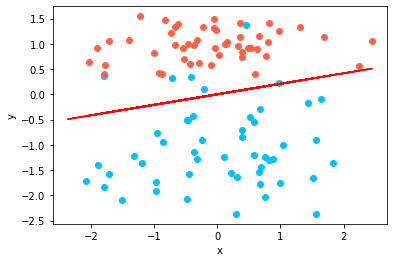

Done!


In [59]:
if __name__ == '__main__':
    
    # generate 2d classification dataset

    #X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

    #x, y = make_regression(n_samples=1000, n_features=1, n_informative=1, 
    #                    random_state=0, noise=35) 
    #x, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=1)
    #x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)
    x, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,n_samples=100)
    print ('x.shape = %s y.shape = %s' %(x.shape, y.shape))

    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient acent
    theta0, theta0_seq, J_seq = gradient_ascent_BGA(alpha, x, y, ep, max_iter=2000)
    print (('theta0 = %s') %(theta0)) 

    n = x.shape[0]
    #Calculate the cost of logistic regression using residual sum of squares and root-mean-square error
    #(y[i]* math.log(sigmoid(t0*x[i]))) ???
    rss = sum([(x[i][1]* math.log(sigmoid(theta0[0]*x[i][0])))**2 for i in range(n)])
    erms = math.sqrt(rss/n)
    print (('the cost of logistic regression (rss, erms) = (%s, %s') %(rss, erms)) 
    
    
    # plot
    #for i in range(x.shape[0]):
    #    y_predict = sigmoid(theta0*x)
    y_predict = theta0[0]*x 
    x1 = [x[i][0] for i in range(len(x))]
    x2 = [x[i][1] for i in range(len(x))]


    x_1 = x[np.where(y== 0.0)]
    x_2 = x[np.where(y==1.0)]
    pylab.plot(x, y_predict, '-r', label='y=2x+1')
    #pylab.scatter(x1,x2)
    pylab.scatter([x_1[:,0]], [x_1[:,1]], c = 'deepskyblue', label = 'y = 0' )
    pylab.scatter([x_2[:,0]], [x_2[:,1]], c = 'tomato', label = 'y = 1' )

    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.show()
    
    #pylab.plot(theta0_seq, 'k-')
    #pylab.ylabel('t0');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    
    #pylab.plot(J_seq, 'k-',label="ERROR")
    #pylab.ylabel('J');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    print ("Done!")
    

--SGA using Logistic regression

In [60]:
#STOCHASTIC GRADIENT ASCENT
import numpy as np
import math
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
from sklearn.metrics import mean_squared_error
import pylab
from scipy import stats
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs


def sigmoid(t):
    return 1 / (1 + np.exp(-t))


def gradient_ascent_SGD(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    n = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    print(t0)

    # total error, J(theta)
    # cost function for logistec regression
    
    J = cost_function(t0, x, y)
    
    holder_t0 = [t0]
    holder_J  = [J]
    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        for i in range(n):
            grad0 = cost_function(t0, x, y) 

            # update the theta_temp
            temp0 = np.subtract(t0, np.multiply(alpha, grad0))             
    
            # update theta
            t0 = temp0
#             print(t0)
        
        holder_t0.append(t0)

        # mean squared error 
        Y = np.array(y)
        X = np.array(x)
        e = 0.5*np.sum( [ (np.dot(Y,np.log(sigmoid(np.multiply(t0,X)))) )**2 ] ) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
        
        if e>J: converged = True
 
  
        J = e   # update error
        holder_J.append(J)
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0, holder_t0, holder_J


x.shape = (100, 2) y.shape = (100,)
[0.04546467 0.84051994]
theta0 = [-0.41221339  0.38284188]
the cost of logistic regression (rss, erms) = (2128.3973225958935, 4.613455670748223


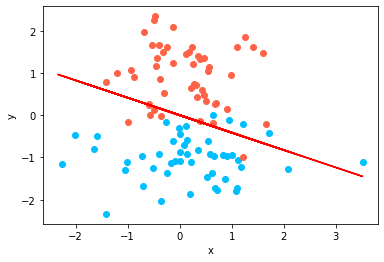

Done!


In [66]:

if __name__ == '__main__':
    
    #x, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=0)
    x, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

    print ('x.shape = %s y.shape = %s' %(x.shape, y.shape))
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta0_seq, J_seq = gradient_ascent_SGD(alpha, x, y, ep, max_iter=1000)
    print (('theta0 = %s') %theta0) 
    
    n = x.shape[0]
    #Calculate the cost of linear regression using residual sum of squares and root-mean-square error
    Y = np.array(y)
    X = np.array(x)
    rss = np.sum( [ (np.dot(Y,np.log(sigmoid(np.multiply(theta0,X)))) )**2 ] )
    erms = math.sqrt(rss/n)
    print (('the cost of logistic regression (rss, erms) = (%s, %s') %(rss, erms)) 
    
    
    # plot
    #for i in range(x.shape[0]):
    #    y_predict = sigmoid(theta0*x)
    y_predict = theta0[0]*x 
    x1 = [x[i][0] for i in range(len(x))]
    x2 = [x[i][1] for i in range(len(x))]


    x_1 = x[np.where(y== 0.0)]
    x_2 = x[np.where(y==1.0)]
    pylab.plot(x, y_predict, '-r', label='y=2x+1')
    #pylab.scatter(x1,x2)
    pylab.scatter([x_1[:,0]], [x_1[:,1]], c = 'deepskyblue', label = 'y = 0' )
    pylab.scatter([x_2[:,0]], [x_2[:,1]], c = 'tomato', label = 'y = 1' )

    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.show()
    
    #pylab.plot(theta0_seq, 'k-')
    #pylab.ylabel('t0');
    #pylab.xlabel('iteration');
    #pylab.show()
        
    #pylab.plot(J_seq, 'k-',label="ERROR")
    #pylab.ylabel('J');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    print ("Done!")

In [34]:
#########################---Q2---###############################

##2.	[30 points] Derive Hessian matrix for cost function of logistic regression. Then implement the Newton’s method for logistic regression. Use this method for updating parameters in logistic regression using the same dataset that you generated in question 1.

In [67]:
import numpy as np
from scipy.optimize import approx_fprime


def hessian ( x0, epsilon=1.e-5, linear_approx=False, *args ):
    
    f1 = approx_fprime( x0, calculate_cost_function, *args) 

    if linear_approx:
        f1 = np.matrix(f1)
        return f1.transpose() * f1    
    
    n = x0.shape[0]
    hessian = np.zeros ( ( n, n ) )
    
    xx = x0
    for j in xrange( n ):
        xx0 = xx[j] 
        xx[j] = xx0 + epsilon 
        
        f2 = approx_fprime( x0, calculate_cost_function, *args) 
        hessian[:, j] = (f2 - f1)/epsilon # scale...
        xx[j] = xx0        
    return hessian


In [68]:
def newton(f,Df,x0,epsilon,max_iter):

    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None


x.shape = (100, 2) y.shape = (100,)
Converged, iterations:  351 !!!
theta0 = [0.49769766 0.20685056]
the cost of logistic regression (rss, erms) = (77.59886893078517, 0.8809022018974931


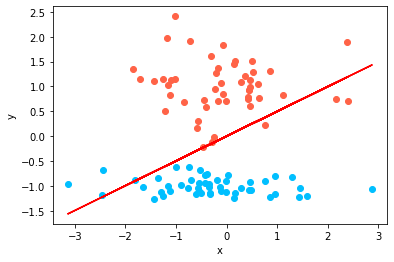

Done!


In [82]:
if __name__ == '__main__':
    
    # generate 2d classification dataset

    x, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,n_samples=100)
    print ('x.shape = %s y.shape = %s' %(x.shape, y.shape))

    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient acent
    theta0, theta0_seq, J_seq = gradient_ascent_BGA(alpha, x, y, ep, max_iter=2000)
    
    print (('theta0 = %s') %(theta0)) 

    n = x.shape[0]
    #Calculate the cost of logistic regression using residual sum of squares and root-mean-square error
    #(y[i]* math.log(sigmoid(t0*x[i]))) ???
    rss = sum([(x[i][1]* math.log(sigmoid(theta0[0]*x[i][0])))**2 for i in range(n)])
    erms = math.sqrt(rss/n)
    print (('the cost of logistic regression (rss, erms) = (%s, %s') %(rss, erms)) 
    
    
    # plot
    #for i in range(x.shape[0]):
    #    y_predict = sigmoid(theta0*x)
    y_predict = theta0[0]*x 
    x1 = [x[i][0] for i in range(len(x))]
    x2 = [x[i][1] for i in range(len(x))]


    x_1 = x[np.where(y== 0.0)]
    x_2 = x[np.where(y==1.0)]
    pylab.plot(x, y_predict, '-r', label='y=2x+1')
    #pylab.scatter(x1,x2)
    pylab.scatter([x_1[:,0]], [x_1[:,1]], c = 'deepskyblue', label = 'y = 0' )
    pylab.scatter([x_2[:,0]], [x_2[:,1]], c = 'tomato', label = 'y = 1' )

    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.show()
    
    #pylab.plot(theta0_seq, 'k-')
    #pylab.ylabel('t0');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    
    #pylab.plot(J_seq, 'k-',label="ERROR")
    #pylab.ylabel('J');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    print ("Done!")
    

##3.	[30 points] Find ‘data.csv’ which is a diabetes dataset containing 768 number of instances (patients) and 8 features. Open the dataset, you will see a matrix with 9 columns and 768 rows. The last row contains information about classes of each instances (0 or 1). Repeat tasks in question 1(b) using this dataset.

In [83]:
import pandas as pd

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


In [84]:
data = load_data("C:/Users/malji/Google Drive/201/ICS 485/Homework/Hw1/data.csv", None)

In [85]:
# x = [data[i][:7] for i in range(len(data))]
# x

In [86]:
x = pd.read_csv("C:/Users/malji/Google Drive/201/ICS 485/Homework/Hw1/data.csv", sep=',',header=None)


In [87]:
x = x.to_numpy(float)
x.shape

(768, 9)

In [88]:
X = [x[i][0:8] for i in range(len(x))]
X = np.array(X)
Y = [x[i][8] for i in range(len(x))]
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


##3)

a)

x.shape = (768, 8) y.shape = (768,)
Converged, iterations:  58 !!!
theta0 = [8.56356139 8.14970915 8.54220711 8.76690261 8.95230154 8.15751037
 8.51540251 8.75959101]
the cost of logistic regression (rss, erms) = (852542.3208942228, 33.317880289683586


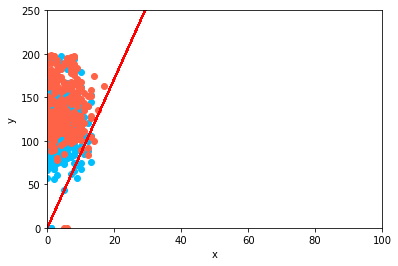

In [91]:
print ('x.shape = %s y.shape = %s' %(X.shape, Y.shape))

alpha = 0.01 # learning rate
ep = 0.01 # convergence criteria

# call gredient acent
theta0, theta0_seq, J_seq = gradient_ascent_BGA(alpha, X, Y, ep, max_iter=2000)
print (('theta0 = %s') %(theta0)) 

n = X.shape[0]
#Calculate the cost of logistic regression using residual sum of squares and root-mean-square error
#(y[i]* math.log(sigmoid(t0*x[i]))) ???
rss = sum([(X[i][1]* math.log(sigmoid(theta0[0]*X[i][0])))**2 for i in range(n)])
erms = math.sqrt(rss/n)
print (('the cost of logistic regression (rss, erms) = (%s, %s') %(rss, erms)) 


# plot
#for i in range(x.shape[0]):
#    y_predict = sigmoid(theta0*x)
y_predict = theta0[0]*X 
x1 = [X[i][0] for i in range(len(X))]
x2 = [X[i][1] for i in range(len(X))]


x_1 = X[np.where(Y== 0.0)]
x_2 = X[np.where(Y==1.0)]
pylab.plot(X, y_predict, '-r', label='y=2x+1')
#pylab.scatter(x1,x2)
pylab.scatter([x_1[:,0]], [x_1[:,1]], c = 'deepskyblue', label = 'y = 0' )
pylab.scatter([x_2[:,0]], [x_2[:,1]], c = 'tomato', label = 'y = 1' )
pylab.xlim([0,100])
pylab.ylim([0,250])

pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

b)

x.shape = (768, 8) y.shape = (768,)
[0.73494056 0.12103422 0.55819538 0.58360896 0.8077914  0.91514418
 0.7458884  0.85609453]


<ipython-input-50-e331601a12f4>:12: RuntimeWarning: divide by zero encountered in log
  y * np.log(probability(theta, x)) + (1 - y) * np.log(
<ipython-input-50-e331601a12f4>:12: RuntimeWarning: invalid value encountered in multiply
  y * np.log(probability(theta, x)) + (1 - y) * np.log(


Max interactions exceeded!
theta0 = [nan nan nan nan nan nan nan nan]
the cost of logistic regression (rss, erms) = (nan, nan


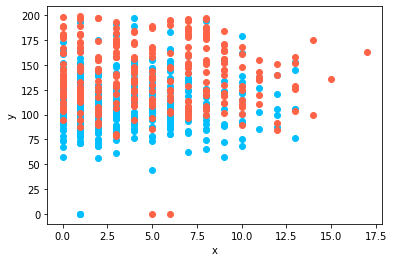

Done!


In [92]:
    print ('x.shape = %s y.shape = %s' %(X.shape, Y.shape))
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta0_seq, J_seq = gradient_ascent_SGD(alpha, X, Y, ep, max_iter=10)
    print (('theta0 = %s') %theta0) 
    
    n = X.shape[0]
    #Calculate the cost of linear regression using residual sum of squares and root-mean-square error
    Y = np.array(Y)
    X = np.array(X)
    rss = np.sum( [ (np.dot(Y,np.log(sigmoid(np.multiply(theta0,X)))) )**2 ] )
    erms = math.sqrt(rss/n)
    print (('the cost of logistic regression (rss, erms) = (%s, %s') %(rss, erms)) 
    
    
    # plot
    #for i in range(x.shape[0]):
    #    y_predict = sigmoid(theta0*x)
    y_predict = theta0[0]*X 
    x1 = [X[i][0] for i in range(len(X))]
    x2 = [X[i][1] for i in range(len(X))]



    pylab.plot(X, y_predict, '-r', label='y=2x+1')
    #pylab.scatter(x1,x2)
    pylab.scatter([x_1[:,0]], [x_1[:,1]], c = 'deepskyblue', label = 'y = 0' )
    pylab.scatter([x_2[:,0]], [x_2[:,1]], c = 'tomato', label = 'y = 1' )

    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.show()
    
    #pylab.plot(theta0_seq, 'k-')
    #pylab.ylabel('t0');
    #pylab.xlabel('iteration');
    #pylab.show()
        
    #pylab.plot(J_seq, 'k-',label="ERROR")
    #pylab.ylabel('J');
    #pylab.xlabel('iteration');
    #pylab.show()
    
    print ("Done!")